In [1]:
import pandas_datareader as pdr
key="0ba9363401b7f9f2b68635fd292b29ff5bf19910"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2017-01-11 00:00:00+00:00  119.75  119.93  ...      0.0          1.0
       2017-01-12 00:00:00+00:00  119.25  119.30  ...      0.0          1.0
       2017-01-13 00:00:00+00:00  119.04  119.62  ...      0.0          1.0
       2017-01-17 00:00:00+00:00  120.00  120.24  ...      0.0          1.0
       2017-01-18 00:00:00+00:00  119.99  120.50  ...      0.0          1.0

[5 rows x 12 columns]

In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       119.75
1       119.25
2       119.04
3       120.00
4       119.99
         ...  
1253    182.01
1254    179.70
1255    174.92
1256    172.00
1257    172.17
Name: close, Length: 1258, dtype: float64

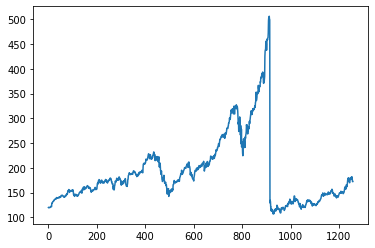

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

0       119.75
1       119.25
2       119.04
3       120.00
4       119.99
         ...  
1253    182.01
1254    179.70
1255    174.92
1256    172.00
1257    172.17
Name: close, Length: 1258, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

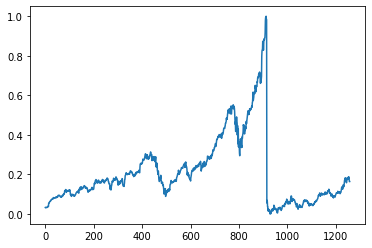

In [12]:
plt.plot(df1)

In [13]:
df1

array([[0.03233563],
       [0.03108328],
       [0.03055729],
       ...,
       [0.17051972],
       [0.16320601],
       [0.16363181]])

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 385ms/step - loss: 0.0211 - val_loss: 0.0096
Epoch 2/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0041 - val_loss: 0.0200
Epoch 3/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0020 - val_loss: 0.0138
Epoch 4/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0011 - val_loss: 0.0149
Epoch 5/100
12/12 [==============================] - 3s 223ms/step - loss: 9.9131e-04 - val_loss: 0.0154
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 8.9461e-04 - val_loss: 0.0144
Epoch 7/100
12/12 [==============================] - 3s 225ms/step - loss: 8.1519e-04 - val_loss: 0.0152
Epoch 8/100
12/12 [==============================] - 3s 222ms/step - loss: 8.2579e-04 - val_loss: 0.0158
Epoch 9/100
12/12 [==============================] - 3s 222ms/step - loss: 8.2132e-04 - val_loss: 0.0128
Epoch 10/100
12/12 [==============================] - 3s 219ms/step - 

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.7.0'

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

204.0027024749686

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

140.38486410475264

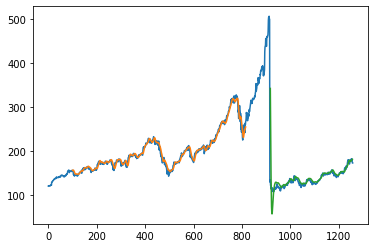

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

441

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.18019597]
101
1 day input [0.09983719 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114
 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289
 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386
 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

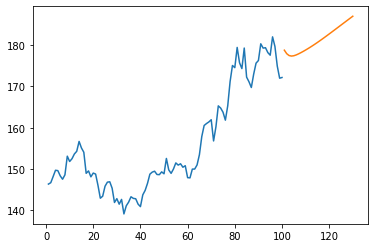

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

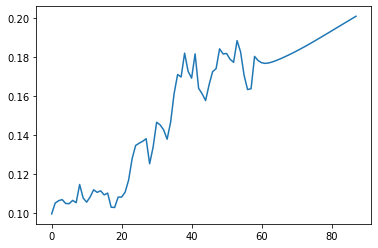

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

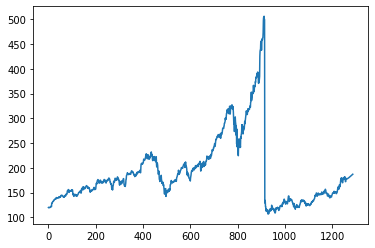

In [44]:
plt.plot(df3)